In [ ]:
import os

In [ ]:
import os

In [ ]:
#%%

import scanpy as sc
import pandas as pd
import numpy as np
import scarches as sca
from scarches.dataset.trvae.data_handling import remove_sparsity
from scipy import sparse
from anndata import AnnData
from typing import Optional, Union

## Initialize folders

/usr/local/conda/envs/scarches/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
 captum (see https://github.com/pytorch/captum).


In [ ]:
#%%

import configparser

# Read configuration file
config = configparser.ConfigParser()
config.read("../../utils/config.ini")

rawPath = config.get("DEFAULT", "rawPath")
scriptsPath = config.get("DEFAULT", "scriptsPath")
figPath = config.get("DEFAULT", "figPath")

initDir = rawPath + 'metacells_step0/fibroblasts/'
outDir = rawPath + 'integration/metacells/fibroblasts_testing_ovca/'
ooseDir = rawPath + 'out_of_sample_extension/fibroblasts_testing_ovca/'
genes = scriptsPath + '4_hdg/Tables/atlas_hdg_dispersion_patients_fibroblasts.csv'

In [ ]:
#%%

if not os.path.exists(outDir):
    os.makedirs(outDir)
## Setting fig parameteres
sc.settings.set_figure_params(dpi_save=300, frameon=False, format='png')
sc.settings.figdir = figPath + "oose/fibroblasts_testing/"

## Loading reference data and creating integration model

In [ ]:
Geistlinger2020_filt_norm_nolog

NameError: name 'Geistlinger2020_filt_norm_nolog' is not defined

In [ ]:
path = rawPath

In [ ]:
rawPath

'/group/testa/Project/OvarianAtlasTestStep0/raw_data/'

In [ ]:
rawPath

'/group/testa/Project/OvarianAtlasTestStep0/raw_data/'

In [ ]:
initPath = "/group/testa/Project/OvarianAtlasTestStep0/raw_data/original_counts/Geistlinger2020/Adata/geistlinger2020_rawcounts.h5ad"

In [ ]:
init = sc.read_h5ad(initPath)

In [ ]:
ini

NameError: name 'ini' is not defined

In [ ]:
init

AnnData object with n_obs × n_vars = 52121 × 33538
    obs: 'ID', 'sample_name', 'tissue', 'developmental_stage', 'treatment', 'recurrence', 'tumor_stage', 'paper_ID', 'anatomical_location'
    uns: 'preprocessing'

In [ ]:
init.X

<52121x33538 sparse matrix of type '<class 'numpy.float32'>'
	with 74403955 stored elements in Compressed Sparse Row format>

In [ ]:
init.X.todense()

matrix([[0., 0., 0., 0., 0., 0., 0., ..., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., ..., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., ..., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., ..., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., ..., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., ..., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., ..., 0., 0., 0., 0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0., 0., 0., 0., ..., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., ..., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., ..., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., ..., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., ..., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., ..., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., ..., 0., 0., 0., 0., 0., 0.

In [ ]:
init.obs

,ID,sample_name,tissue,developmental_stage,treatment,recurrence,tumor_stage,paper_ID,anatomical_location
AAACCTGAGACTTGAA-1-T59,T59,GSM4675273,Metastasis,Advanced stage,CHT,Recurrence,IV,Geistlinger_59,Omentum
AAACCTGAGAGACGAA-1-T59,T59,GSM4675273,Metastasis,Advanced stage,CHT,Recurrence,IV,Geistlinger_59,Omentum
AAACCTGAGAGTACCG-1-T59,T59,GSM4675273,Metastasis,Advanced stage,CHT,Recurrence,IV,Geistlinger_59,Omentum
AAACCTGAGTCATCCA-1-T59,T59,GSM4675273,Metastasis,Advanced stage,CHT,Recurrence,IV,Geistlinger_59,Omentum
AAACCTGAGTGCGATG-1-T59,T59,GSM4675273,Metastasis,Advanced stage,CHT,Recurrence,IV,Geistlinger_59,Omentum
...,...,...,...,...,...,...,...,...,...
TTTGTCAGTCGCATCG-1-T90,T90,GSM4675277,Metastasis,Advanced stage,CHT,Sensitive,IVA,Geistlinger_90,Omentum
TTTGTCAGTCGCCATG-1-T90,T90,GSM4675277,Metastasis,Advanced stage,CHT,Sensitive,IVA,Geistlinger_90,Omentum
TTTGTCAGTGAAAGAG-1-T90,T90,GSM4675277,Metastasis,Advanced stage,CHT,Sensitive,IVA,Geistlinger_90,Omentum
TTTGTCATCAAGAAGT-1-T90,T90,GSM4675277,Metastasis,Advanced stage,CHT,Sensitive,IVA,Geistlinger_90,Omentum


In [ ]:
#%%

ad = sc.read_h5ad("/group/testa/Project/OvarianAtlasTestStep0/OvCA_umap_tiled.h5ad")
major_cell_type = "FibroblastsMSK"
ad = ad[ad.obs["01_major_celltypes"] == major_cell_type]

ad.obs['tissue-treatment'] = ad.obs['02_tissue'].astype('str') + '_' + ad.obs['03_treatment'].astype('str')
ad.obs['cell_type'] = ad.obs.loc[:, 'tissue-treatment']

<ipython-input-17-60b035c1c8b6>:6: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  ad.obs['tissue-treatment'] = ad.obs['02_tissue'].astype('str') + '_' + ad.obs['03_treatment'].astype('str')


In [ ]:
ad

AnnData object with n_obs × n_vars = 6639 × 1542
    obs: '02_tissue', '12_developmental_stage', '03_treatment', '11_recurrence', '10_tumor_stage', '14_paper_ID', '09_anatomical_location', '13_dataset', '08_phase', '07_cell_states', '05_cell_types', '06_cell_subtypes', '01_major_celltypes', '04_functional_annotation', 'tissue-treatment', 'cell_type'
    uns: 'functional_annotation_colors', 'major_celltypes_colors', 'tissue_colors'
    obsm: 'X_umap_shifted'

In [ ]:
ad.X

array([[ 1.61e+00,  3.93e+00,  5.02e+00,  2.74e-01,  2.86e-01,  1.72e+00,
        -8.57e-02, ...,  4.34e-02,  4.59e+00,  4.66e+00,  6.00e+00,
         6.03e+00,  1.33e+00,  6.95e-02],
       [ 1.79e+00,  3.55e+00,  5.31e+00,  2.93e-01,  6.91e-02,  2.20e+00,
        -7.51e-02, ...,  3.23e-02,  4.99e+00,  4.77e+00,  6.36e+00,
         6.37e+00,  1.52e+00,  4.18e-02],
       [ 1.63e+00,  2.95e+00,  4.97e+00,  1.65e-01, -3.10e-02,  1.69e+00,
        -5.04e-02, ..., -1.04e-02,  4.69e+00,  4.22e+00,  5.88e+00,
         5.95e+00,  1.14e+00, -4.77e-03],
       [ 1.36e+00,  2.98e+00,  4.69e+00,  1.52e-01,  6.02e-02,  1.29e+00,
        -7.05e-02, ..., -3.57e-03,  4.35e+00,  4.03e+00,  5.56e+00,
         5.62e+00,  1.07e+00,  3.37e-02],
       [ 1.49e+00,  3.26e+00,  4.85e+00,  1.43e-01,  6.47e-02,  1.71e+00,
        -7.99e-02, ...,  3.77e-02,  4.48e+00,  4.13e+00,  5.79e+00,
         5.85e+00,  9.65e-01, -1.79e-02],
       [ 1.46e+00,  3.33e+00,  5.04e+00,  2.30e-01,  2.33e-01,  1.27e+00,
      

In [ ]:
ad.X.raw

AttributeError: 'numpy.ndarray' object has no attribute 'raw'

In [ ]:
ad.raw

In [ ]:
ad.raw.X

<6639x17063 sparse matrix of type '<class 'numpy.float32'>'
	with 55854324 stored elements in Compressed Sparse Row format>

In [ ]:
x = ad.X

In [ ]:
xRaw = ad.raw.X

In [ ]:
x

array([[ 1.61e+00,  3.93e+00,  5.02e+00,  2.74e-01,  2.86e-01,  1.72e+00,
        -8.57e-02, ...,  4.34e-02,  4.59e+00,  4.66e+00,  6.00e+00,
         6.03e+00,  1.33e+00,  6.95e-02],
       [ 1.79e+00,  3.55e+00,  5.31e+00,  2.93e-01,  6.91e-02,  2.20e+00,
        -7.51e-02, ...,  3.23e-02,  4.99e+00,  4.77e+00,  6.36e+00,
         6.37e+00,  1.52e+00,  4.18e-02],
       [ 1.63e+00,  2.95e+00,  4.97e+00,  1.65e-01, -3.10e-02,  1.69e+00,
        -5.04e-02, ..., -1.04e-02,  4.69e+00,  4.22e+00,  5.88e+00,
         5.95e+00,  1.14e+00, -4.77e-03],
       [ 1.36e+00,  2.98e+00,  4.69e+00,  1.52e-01,  6.02e-02,  1.29e+00,
        -7.05e-02, ..., -3.57e-03,  4.35e+00,  4.03e+00,  5.56e+00,
         5.62e+00,  1.07e+00,  3.37e-02],
       [ 1.49e+00,  3.26e+00,  4.85e+00,  1.43e-01,  6.47e-02,  1.71e+00,
        -7.99e-02, ...,  3.77e-02,  4.48e+00,  4.13e+00,  5.79e+00,
         5.85e+00,  9.65e-01, -1.79e-02],
       [ 1.46e+00,  3.33e+00,  5.04e+00,  2.30e-01,  2.33e-01,  1.27e+00,
      

In [ ]:
xRaw = xRaw.todense()

In [ ]:
xRaw

matrix([[0.  , 0.7 , 0.67, 2.28, 3.35, 0.69, 1.41, ..., 5.19, 4.71, 3.38,
         5.23, 4.25, 0.75, 4.97],
        [0.  , 1.26, 1.05, 0.63, 4.07, 1.37, 1.96, ..., 5.82, 5.33, 4.11,
         5.86, 5.04, 2.15, 5.7 ],
        [0.  , 0.  , 1.69, 0.83, 3.02, 0.77, 1.51, ..., 6.23, 6.05, 4.98,
         6.37, 5.76, 2.04, 6.21],
        [0.77, 0.  , 0.86, 0.88, 3.55, 0.66, 1.69, ..., 5.91, 5.66, 4.46,
         5.98, 5.34, 2.6 , 5.87],
        [0.  , 0.  , 1.55, 1.98, 3.49, 0.64, 1.39, ..., 6.06, 5.72, 4.09,
         6.02, 5.17, 2.25, 5.92],
        [0.  , 0.  , 0.76, 0.57, 3.  , 0.  , 1.55, ..., 4.99, 4.64, 3.26,
         5.17, 4.53, 1.32, 4.86],
        [0.  , 1.42, 0.  , 2.4 , 3.02, 0.  , 1.61, ..., 6.03, 5.84, 4.56,
         6.1 , 5.47, 1.84, 6.  ],
        ...,
        [0.  , 0.39, 0.  , 0.62, 1.64, 0.43, 0.  , ..., 4.09, 4.1 , 3.34,
         4.03, 3.67, 2.01, 4.01],
        [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , ..., 1.78, 1.74, 0.78,
         1.64, 1.31, 1.  , 1.67],
        [0.  , 

In [ ]:
xù

NameError: name 'xù' is not defined

In [ ]:
x

array([[ 1.61e+00,  3.93e+00,  5.02e+00,  2.74e-01,  2.86e-01,  1.72e+00,
        -8.57e-02, ...,  4.34e-02,  4.59e+00,  4.66e+00,  6.00e+00,
         6.03e+00,  1.33e+00,  6.95e-02],
       [ 1.79e+00,  3.55e+00,  5.31e+00,  2.93e-01,  6.91e-02,  2.20e+00,
        -7.51e-02, ...,  3.23e-02,  4.99e+00,  4.77e+00,  6.36e+00,
         6.37e+00,  1.52e+00,  4.18e-02],
       [ 1.63e+00,  2.95e+00,  4.97e+00,  1.65e-01, -3.10e-02,  1.69e+00,
        -5.04e-02, ..., -1.04e-02,  4.69e+00,  4.22e+00,  5.88e+00,
         5.95e+00,  1.14e+00, -4.77e-03],
       [ 1.36e+00,  2.98e+00,  4.69e+00,  1.52e-01,  6.02e-02,  1.29e+00,
        -7.05e-02, ..., -3.57e-03,  4.35e+00,  4.03e+00,  5.56e+00,
         5.62e+00,  1.07e+00,  3.37e-02],
       [ 1.49e+00,  3.26e+00,  4.85e+00,  1.43e-01,  6.47e-02,  1.71e+00,
        -7.99e-02, ...,  3.77e-02,  4.48e+00,  4.13e+00,  5.79e+00,
         5.85e+00,  9.65e-01, -1.79e-02],
       [ 1.46e+00,  3.33e+00,  5.04e+00,  2.30e-01,  2.33e-01,  1.27e+00,
      

In [ ]:
xRaw

matrix([[0.  , 0.7 , 0.67, 2.28, 3.35, 0.69, 1.41, ..., 5.19, 4.71, 3.38,
         5.23, 4.25, 0.75, 4.97],
        [0.  , 1.26, 1.05, 0.63, 4.07, 1.37, 1.96, ..., 5.82, 5.33, 4.11,
         5.86, 5.04, 2.15, 5.7 ],
        [0.  , 0.  , 1.69, 0.83, 3.02, 0.77, 1.51, ..., 6.23, 6.05, 4.98,
         6.37, 5.76, 2.04, 6.21],
        [0.77, 0.  , 0.86, 0.88, 3.55, 0.66, 1.69, ..., 5.91, 5.66, 4.46,
         5.98, 5.34, 2.6 , 5.87],
        [0.  , 0.  , 1.55, 1.98, 3.49, 0.64, 1.39, ..., 6.06, 5.72, 4.09,
         6.02, 5.17, 2.25, 5.92],
        [0.  , 0.  , 0.76, 0.57, 3.  , 0.  , 1.55, ..., 4.99, 4.64, 3.26,
         5.17, 4.53, 1.32, 4.86],
        [0.  , 1.42, 0.  , 2.4 , 3.02, 0.  , 1.61, ..., 6.03, 5.84, 4.56,
         6.1 , 5.47, 1.84, 6.  ],
        ...,
        [0.  , 0.39, 0.  , 0.62, 1.64, 0.43, 0.  , ..., 4.09, 4.1 , 3.34,
         4.03, 3.67, 2.01, 4.01],
        [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , ..., 1.78, 1.74, 0.78,
         1.64, 1.31, 1.  , 1.67],
        [0.  , 

In [ ]:
adataRaw = ad.raw.to_adata()

In [ ]:
adataRaw.var_names

Index(['FAM87B', 'LINC00115', 'FAM41C', 'SAMD11', 'NOC2L', 'KLHL17', 'PLEKHN1',
       'HES4', 'ISG15', 'AGRN',
       ...
       'MT-CO2', 'MT-ATP8', 'MT-ATP6', 'MT-CO3', 'MT-ND3', 'MT-ND4L', 'MT-ND4',
       'MT-ND5', 'MT-ND6', 'MT-CYB'],
      dtype='object', length=17063)

In [ ]:
rawNames = adataRaw.var_names

In [ ]:
ad.var_names

Index(['SAMD11', 'HES4', 'ISG15', 'TNFRSF18', 'TNFRSF4', 'MEGF6', 'CHD5',
       'HES2', 'TNFRSF25', 'UTS2',
       ...
       'MX2', 'MX1', 'TFF3', 'UBASH3A', 'CSTB', 'COL18A1', 'COL6A1', 'COL6A2',
       'C21orf58', 'S100B'],
      dtype='object', length=1542)

In [ ]:
rawNames

Index(['FAM87B', 'LINC00115', 'FAM41C', 'SAMD11', 'NOC2L', 'KLHL17', 'PLEKHN1',
       'HES4', 'ISG15', 'AGRN',
       ...
       'MT-CO2', 'MT-ATP8', 'MT-ATP6', 'MT-CO3', 'MT-ND3', 'MT-ND4L', 'MT-ND4',
       'MT-ND5', 'MT-ND6', 'MT-CYB'],
      dtype='object', length=17063)

In [ ]:
pd.DataFrame(rawNames)

,0
0,FAM87B
1,LINC00115
2,FAM41C
3,SAMD11
4,NOC2L
...,...
17058,MT-ND4L
17059,MT-ND4
17060,MT-ND5
17061,MT-ND6


In [ ]:
pd.DataFrame(rawNames).isin(ad.var_names)

,0
0,False
1,False
2,False
3,True
4,False
...,...
17058,False
17059,False
17060,False
17061,False


In [ ]:
rawNamesMask = pd.DataFrame(rawNames).isin(ad.var_names)

In [ ]:
sum(rawNamesMask)

0

In [ ]:
rawNamesMask.sum()

0    1542
dtype: int64

In [ ]:
rawNamesFiltered = adataRaw.var_names[rawNamesMask]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [ ]:
rawNamesFiltered = adataRaw.var_names[rawNamesMask.iloc[0]]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 17063 but corresponding boolean dimension is 1

In [ ]:
rawNamesMask.iloc[0]

0    False
Name: 0, dtype: bool

In [ ]:
rawNamesMask.iloc[:0]

,0


In [ ]:
rawNamesMask.iloc[,:0]


SyntaxError: invalid syntax (<ipython-input-45-01586b7a3b07>, line 1)

In [ ]:
rawNamesMask



,0
0,False
1,False
2,False
3,True
4,False
...,...
17058,False
17059,False
17060,False
17061,False


In [ ]:
rawNamesMask["0"]

KeyError: '0'

In [ ]:
rawNamesMask[0]

0        False
1        False
2        False
3         True
4        False
         ...  
17058    False
17059    False
17060    False
17061    False
17062    False
Name: 0, Length: 17063, dtype: bool

In [ ]:
rawNamesFiltered = adataRaw.var_names[rawNamesMask[0]]

In [ ]:
rawNamesFiltered

Index(['SAMD11', 'HES4', 'ISG15', 'TNFRSF18', 'TNFRSF4', 'MEGF6', 'CHD5',
       'HES2', 'TNFRSF25', 'UTS2',
       ...
       'MX2', 'MX1', 'TFF3', 'UBASH3A', 'CSTB', 'COL18A1', 'COL6A1', 'COL6A2',
       'C21orf58', 'S100B'],
      dtype='object', length=1542)

In [ ]:
rawNamesFiltered == ad.var_names

array([ True,  True,  True,  True,  True,  True,  True, ...,  True,  True,
        True,  True,  True,  True,  True])

In [ ]:
all(rawNamesFiltered == ad.var_names)

True

In [ ]:
xRaw

matrix([[0.  , 0.7 , 0.67, 2.28, 3.35, 0.69, 1.41, ..., 5.19, 4.71, 3.38,
         5.23, 4.25, 0.75, 4.97],
        [0.  , 1.26, 1.05, 0.63, 4.07, 1.37, 1.96, ..., 5.82, 5.33, 4.11,
         5.86, 5.04, 2.15, 5.7 ],
        [0.  , 0.  , 1.69, 0.83, 3.02, 0.77, 1.51, ..., 6.23, 6.05, 4.98,
         6.37, 5.76, 2.04, 6.21],
        [0.77, 0.  , 0.86, 0.88, 3.55, 0.66, 1.69, ..., 5.91, 5.66, 4.46,
         5.98, 5.34, 2.6 , 5.87],
        [0.  , 0.  , 1.55, 1.98, 3.49, 0.64, 1.39, ..., 6.06, 5.72, 4.09,
         6.02, 5.17, 2.25, 5.92],
        [0.  , 0.  , 0.76, 0.57, 3.  , 0.  , 1.55, ..., 4.99, 4.64, 3.26,
         5.17, 4.53, 1.32, 4.86],
        [0.  , 1.42, 0.  , 2.4 , 3.02, 0.  , 1.61, ..., 6.03, 5.84, 4.56,
         6.1 , 5.47, 1.84, 6.  ],
        ...,
        [0.  , 0.39, 0.  , 0.62, 1.64, 0.43, 0.  , ..., 4.09, 4.1 , 3.34,
         4.03, 3.67, 2.01, 4.01],
        [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , ..., 1.78, 1.74, 0.78,
         1.64, 1.31, 1.  , 1.67],
        [0.  , 

In [ ]:
xRaw[:,1]

matrix([[0.7 ],
        [1.26],
        [0.  ],
        [0.  ],
        [0.  ],
        [0.  ],
        [1.42],
        ...,
        [0.39],
        [0.  ],
        [0.  ],
        [0.  ],
        [0.  ],
        [0.  ],
        [0.  ]], dtype=float32)

In [ ]:
xRaw[1,:]

matrix([[0.  , 1.26, 1.05, 0.63, 4.07, 1.37, 1.96, ..., 5.82, 5.33, 4.11,
         5.86, 5.04, 2.15, 5.7 ]], dtype=float32)

In [ ]:
xRaw[:,rawNamesMask]

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

In [ ]:
xRaw[:,rawNamesMask[0]]

matrix([[2.28, 3.95, 5.2 , 0.  , 1.09, 1.76, 0.  , ..., 0.  , 4.92, 4.96,
         6.22, 6.25, 1.31, 0.  ],
        [0.63, 3.83, 5.53, 0.  , 0.  , 3.54, 0.  , ..., 0.  , 5.58, 5.02,
         6.7 , 6.72, 1.95, 0.  ],
        [0.83, 3.73, 5.73, 0.  , 0.  , 2.35, 0.  , ..., 0.  , 5.18, 4.38,
         6.27, 6.33, 0.74, 0.  ],
        [0.88, 3.63, 4.96, 0.  , 0.  , 1.26, 0.  , ..., 0.  , 4.95, 4.52,
         6.14, 6.19, 1.23, 0.  ],
        [1.98, 4.36, 5.35, 0.56, 0.  , 1.53, 0.  , ..., 0.  , 4.9 , 4.44,
         6.11, 6.16, 1.3 , 0.  ],
        [0.57, 4.1 , 5.41, 0.  , 0.54, 0.  , 0.  , ..., 0.  , 4.96, 4.7 ,
         6.12, 6.13, 1.64, 0.  ],
        [2.4 , 3.04, 4.93, 0.  , 0.  , 2.98, 0.  , ..., 0.  , 4.81, 4.71,
         6.16, 6.2 , 0.  , 0.  ],
        ...,
        [0.62, 2.53, 3.07, 0.  , 0.  , 0.27, 0.  , ..., 0.  , 3.21, 2.11,
         2.35, 2.67, 0.58, 0.  ],
        [0.  , 0.  , 1.12, 0.  , 0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ,
         0.  , 0.  , 0.  , 0.  ],
        [0.  , 

In [ ]:
xRawFiltered = xRaw[:,rawNamesMask[0]]

In [ ]:
xRawFiltered

matrix([[2.28, 3.95, 5.2 , 0.  , 1.09, 1.76, 0.  , ..., 0.  , 4.92, 4.96,
         6.22, 6.25, 1.31, 0.  ],
        [0.63, 3.83, 5.53, 0.  , 0.  , 3.54, 0.  , ..., 0.  , 5.58, 5.02,
         6.7 , 6.72, 1.95, 0.  ],
        [0.83, 3.73, 5.73, 0.  , 0.  , 2.35, 0.  , ..., 0.  , 5.18, 4.38,
         6.27, 6.33, 0.74, 0.  ],
        [0.88, 3.63, 4.96, 0.  , 0.  , 1.26, 0.  , ..., 0.  , 4.95, 4.52,
         6.14, 6.19, 1.23, 0.  ],
        [1.98, 4.36, 5.35, 0.56, 0.  , 1.53, 0.  , ..., 0.  , 4.9 , 4.44,
         6.11, 6.16, 1.3 , 0.  ],
        [0.57, 4.1 , 5.41, 0.  , 0.54, 0.  , 0.  , ..., 0.  , 4.96, 4.7 ,
         6.12, 6.13, 1.64, 0.  ],
        [2.4 , 3.04, 4.93, 0.  , 0.  , 2.98, 0.  , ..., 0.  , 4.81, 4.71,
         6.16, 6.2 , 0.  , 0.  ],
        ...,
        [0.62, 2.53, 3.07, 0.  , 0.  , 0.27, 0.  , ..., 0.  , 3.21, 2.11,
         2.35, 2.67, 0.58, 0.  ],
        [0.  , 0.  , 1.12, 0.  , 0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ,
         0.  , 0.  , 0.  , 0.  ],
        [0.  , 

In [ ]:
import seaborn as sns

KeyboardInterrupt: 

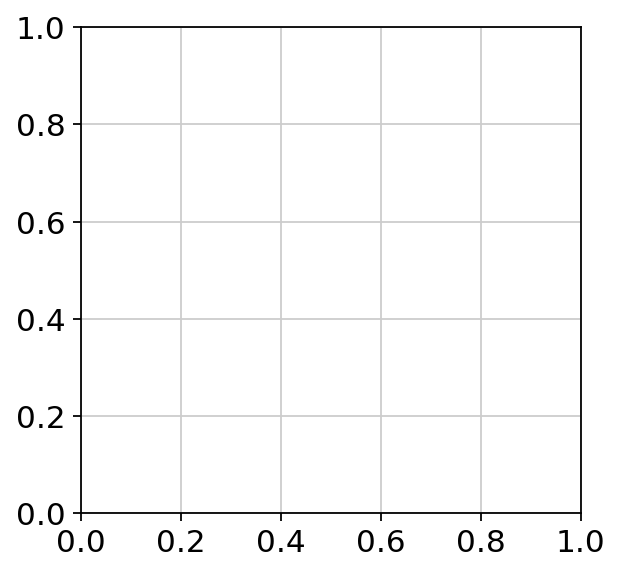

In [ ]:
sns.histplot(xRaw)

KeyboardInterrupt: 

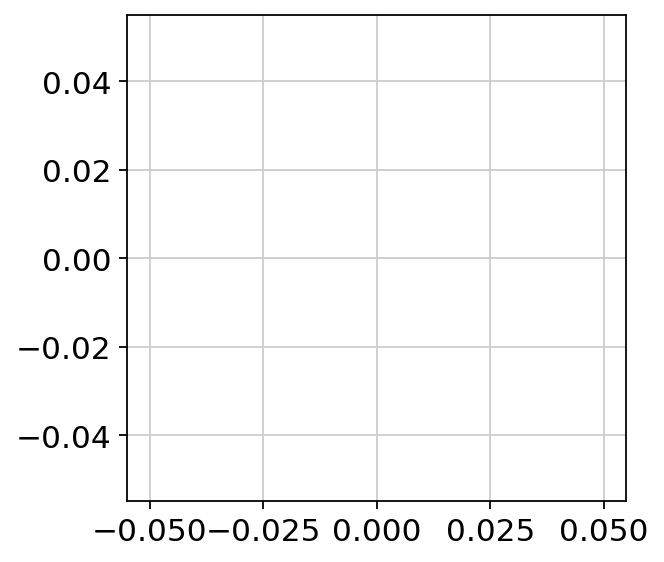

In [ ]:
sns.histplot(xRaw[1,:])

In [ ]:
xRaw

matrix([[0.  , 0.7 , 0.67, 2.28, 3.35, 0.69, 1.41, ..., 5.19, 4.71, 3.38,
         5.23, 4.25, 0.75, 4.97],
        [0.  , 1.26, 1.05, 0.63, 4.07, 1.37, 1.96, ..., 5.82, 5.33, 4.11,
         5.86, 5.04, 2.15, 5.7 ],
        [0.  , 0.  , 1.69, 0.83, 3.02, 0.77, 1.51, ..., 6.23, 6.05, 4.98,
         6.37, 5.76, 2.04, 6.21],
        [0.77, 0.  , 0.86, 0.88, 3.55, 0.66, 1.69, ..., 5.91, 5.66, 4.46,
         5.98, 5.34, 2.6 , 5.87],
        [0.  , 0.  , 1.55, 1.98, 3.49, 0.64, 1.39, ..., 6.06, 5.72, 4.09,
         6.02, 5.17, 2.25, 5.92],
        [0.  , 0.  , 0.76, 0.57, 3.  , 0.  , 1.55, ..., 4.99, 4.64, 3.26,
         5.17, 4.53, 1.32, 4.86],
        [0.  , 1.42, 0.  , 2.4 , 3.02, 0.  , 1.61, ..., 6.03, 5.84, 4.56,
         6.1 , 5.47, 1.84, 6.  ],
        ...,
        [0.  , 0.39, 0.  , 0.62, 1.64, 0.43, 0.  , ..., 4.09, 4.1 , 3.34,
         4.03, 3.67, 2.01, 4.01],
        [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , ..., 1.78, 1.74, 0.78,
         1.64, 1.31, 1.  , 1.67],
        [0.  , 

In [ ]:
xRaw[1,:]

matrix([[0.  , 1.26, 1.05, 0.63, 4.07, 1.37, 1.96, ..., 5.82, 5.33, 4.11,
         5.86, 5.04, 2.15, 5.7 ]], dtype=float32)

In [ ]:
len(xRaw[1,:])

1

In [ ]:
xRaw[1,:].shape

(1, 17063)

In [ ]:
sns.histplot(xRaw[1,:], bins=50)

KeyboardInterrupt: 

In [ ]:
sns.histplot(x[1,:], bins=50)